<a href="https://colab.research.google.com/github/dawud-shakir/CS591-DIP/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'Lenna.png'

For PIL, .size gives us (W, H) Width First (x, y)

---



Format: PNG
Size: (512, 512), Width:512, Height:512
Mode: RGB


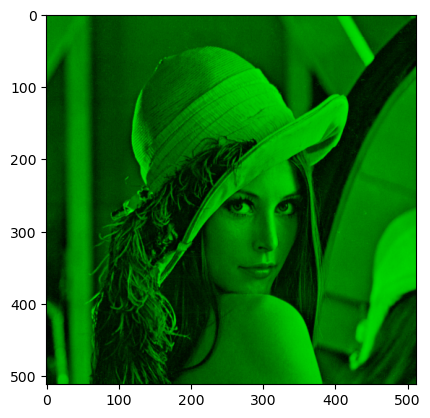

In [2]:
from PIL import Image
# Load an image
img_pil = Image.open(filename)
W, H = img_pil.size

R, G, B = img_pil.split()
# R = img_pil.getchannel('R')
# G = img_pil.getchannel('G')
# B = img_pil.getchannel('B')

zeros = np.zeros_like(R)
red_channel   = np.stack([R, zeros, zeros], axis=2)
green_channel  = np.stack([zeros, G, zeros], axis=2)
blue_channel   = np.stack([zeros, zeros, B], axis=2)

#print out properties
print(f"Format: {img_pil.format}")
print(f"Size: {img_pil.size}, Width:{W}, Height:{H}")# (Width, Height)
print(f"Mode: {img_pil.mode}")

plt.imshow(green_channel)
plt.show()

In PIL, you operate (x, y) on a geometric plane. In NumPy, you work on a matrix and operate (row, column). For NumPy, .shape gives us (H, W, C)-> (row, col, channel)

In [3]:
# PIL to NumPy
img = np.array(img_pil)
print(f"Shape: {img.shape}") # (Height, Width, Channels)

# NumPy back to PIL
export_ready_img = Image.fromarray(img.astype(np.uint8))
# export image
export_ready_img.save('exported_image.png')

Shape: (512, 512, 3)


For cv2, .shape gives us (H, W, C) ->: (row, col, channel). Color channels are BGR

Size: (512, 512, 3), Width:512, Height:512, Channel:3


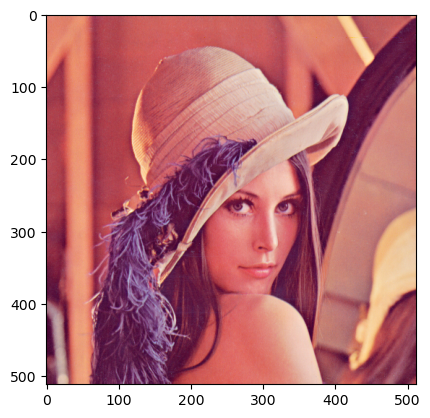

In [4]:
import cv2

img_raw = cv2.imread(filename)
H, W, C = img_raw.shape

B = img_raw[:, :, 0]
G = img_raw[:, :, 1]
R = img_raw[:, :, 2]

zeros = np.zeros_like(R)
# zeros = np.zeros((H, W), dtype="uint8")

red_channel   = np.stack([R, zeros, zeros], axis=2)
green_channel  = np.stack([zeros, G, zeros], axis=2)
blue_channel   = np.stack([zeros, zeros, B], axis=2)

img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

print(f"Size: {img.shape}, Width:{W}, Height:{H}, Channel:{C}")# (Width, Height)

plt.imshow(img)
plt.show()

gray_img mode:L
hsv_img mode:HSV


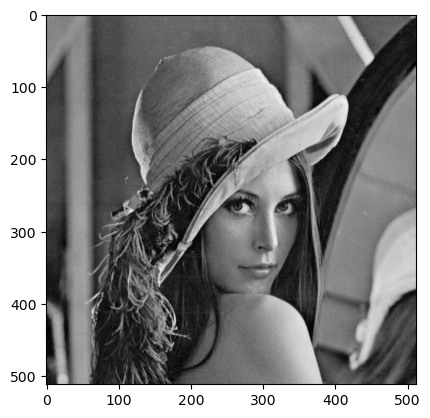

In [5]:
# Convert to Grayscale
gray_pil = img_pil.convert('L')
print(f"gray_img mode:{gray_pil.mode}")

hsv_pil = img_pil.convert('HSV')
print(f"hsv_img mode:{hsv_pil.mode}")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')
plt.show()

cv2.resize(img, (W, H)), opencv uses (W, H) for the dsize parameter

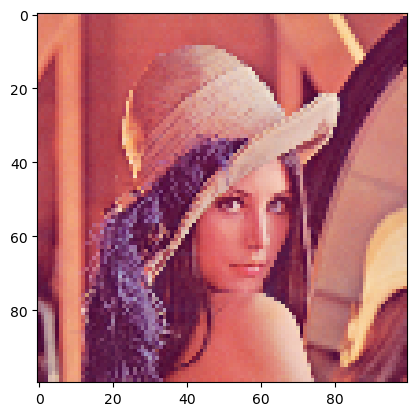

In [6]:
# Resizing
small_pil = img_pil.resize((100, 200))

# cv2.resize(img, (W, H))
small_img = cv2.resize(img, (100, 100))

plt.imshow(small_img)
plt.show()

PIL img.crop((left, upper, right, lower))

cv2 img[row_start: row_end, col_start: col_end] -> [upper:lower, left: right]

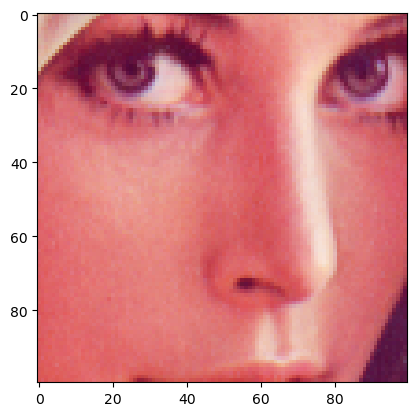

In [7]:
face_pil = img_pil.crop((230, 250, 340, 350))

face_img = img[250:350, 240:340]

plt.imshow(face_img)
plt.show()

In [8]:
def rotation(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [ c, -s, 0],
        [ s,  c, 0],
        [ 0,  0, 1]
    ])

Vectorization operations

In [9]:
import time

# Create a large image
large_img = np.random.randint(0, 256, (2000, 2000, 3), dtype='uint8')

# Vectorized Operation: Set the first (index 0) channel to 0
start = time.time()
no_red_vector = large_img.copy()
no_red_vector[:, :, 0] = 0
end = time.time()

print(f"Vectorized time: {end - start:.6f} seconds")

# Regular Loop Operation
start = time.time()
no_red_loop = large_img.copy()
for i in range(2000):
    for j in range(2000):
        no_red_loop[i, j, 0] = 0
end = time.time()

print(f"Loop time: {end - start:.6f} seconds")

Vectorized time: 0.008698 seconds
Loop time: 0.688820 seconds


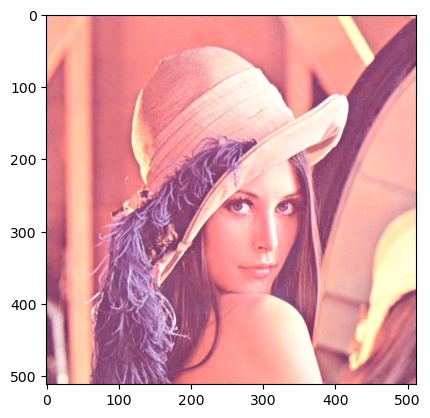

In [10]:
# bright_img = gray_img + 50
bright_img = np.clip(img.astype(np.int16) + 50, 0, 255).astype(np.uint8)

# find all pixels brighter than 128
mask = gray_img > 128
thres_img = np.zeros_like(gray_img)
thres_img[mask] = gray_img[mask]

plt.imshow(bright_img, cmap = 'gray')
plt.show()

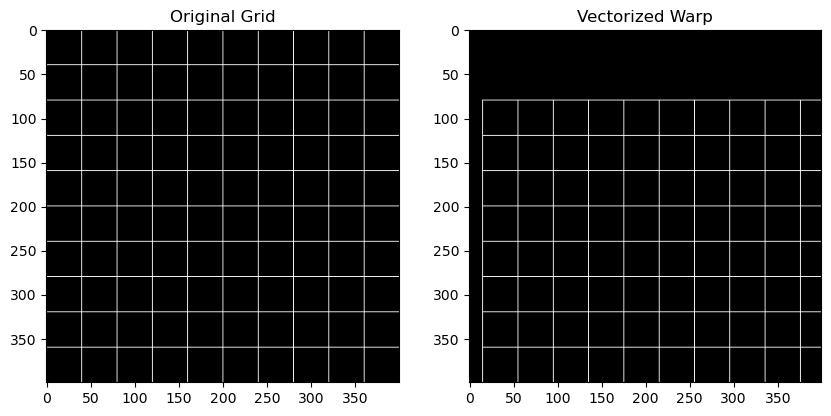

In [14]:
def warp_image(img, tx, ty, scale=1):
    h, w = img.shape[:2]

    # Create the coordinate grid
    x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))


    orig_x = (x_coords - tx) / scale
    orig_y = (y_coords - ty) / scale

    # create a mask boundary, keep on-screen pixels
    orig_x_int = np.round(orig_x).astype(int)
    orig_y_int = np.round(orig_y).astype(int)

    mask = (orig_x_int >= 0) & (orig_x_int < w) & \
                 (orig_y_int >= 0) & (orig_y_int < h)

    # output image
    warped_img = np.zeros_like(img)
    warped_img[y_coords[mask], x_coords[mask]] = img[orig_y_int[mask], orig_x_int[mask]]

    return warped_img


# create a 400x400 grid
test_grid = np.zeros((400, 400), dtype='uint8')
test_grid[::40, :] = 255 # Horizontal lines
test_grid[:, ::40] = 255 # Vertical lines

warped = warp_image(test_grid, tx=15, ty=80)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(test_grid, cmap='gray'); plt.title("Original Grid")
plt.subplot(1, 2, 2); plt.imshow(warped, cmap='gray'); plt.title("Vectorized Warp")
plt.show()

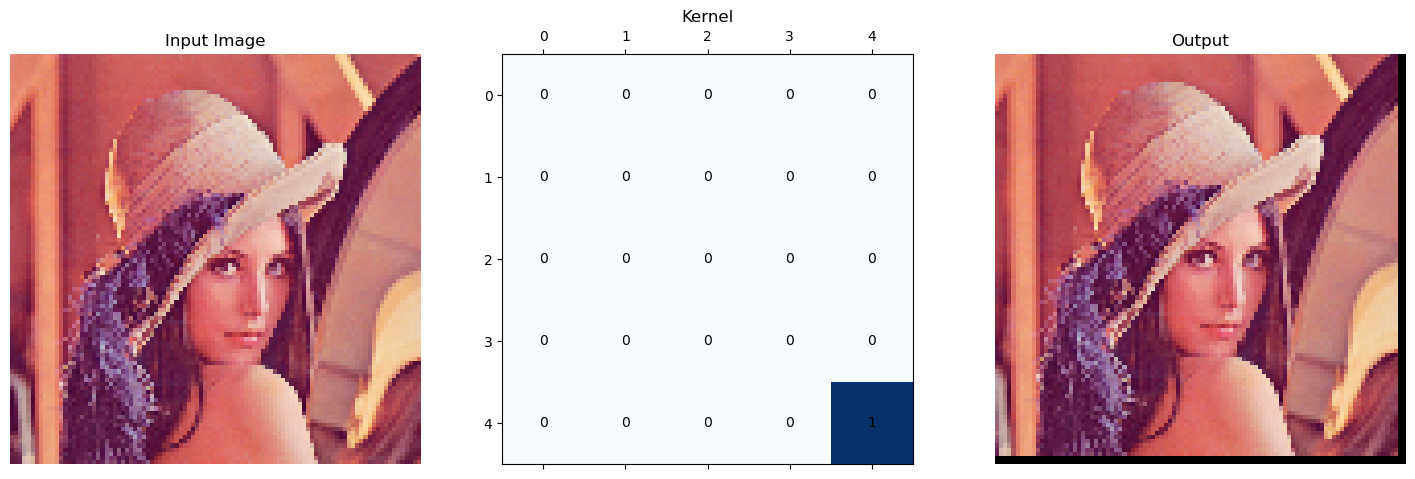

In [12]:
# 5x5 Kernel pixel translation
# '1' at upper left corner shifts pixels
kernel = np.array([
    [1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

k = 5
pad_width = k // 2
kernel = np.flip(kernel)

# Padding for Height and Width, not color channels
padded_img = np.pad(small_img, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='constant')

# Sliding Window
# Window size (k, k, 3) for all three RGB channels
windows = np.lib.stride_tricks.sliding_window_view(padded_img, (k, k, 3))

# After sliding_window_view, shape is (H, W, 1, k, k, 3)
# remove the redundant 1-sized dimension at axis 2
windows = windows.squeeze(axis=2)

# Apply kernel
# add a new axis to kernel so it broadcasts across RGB (k, k, 1)
# Resulting shape after sum (H, W, 3)
conv_img = np.sum(windows * kernel[:, :, np.newaxis], axis=(2, 3)).astype(np.uint8)

#Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(small_img)
axes[0].set_title("Input Image")
axes[0].axis('off')

# Kernel
im_k = axes[1].matshow(kernel, cmap='Blues')
axes[1].set_title("Kernel")
for (i, j), z in np.ndenumerate(kernel):
    axes[1].text(j, i, str(int(z)), ha='center', va='center')

# Convolution result
axes[2].imshow(conv_img)
axes[2].set_title("Output")
axes[2].axis('off')

plt.show()

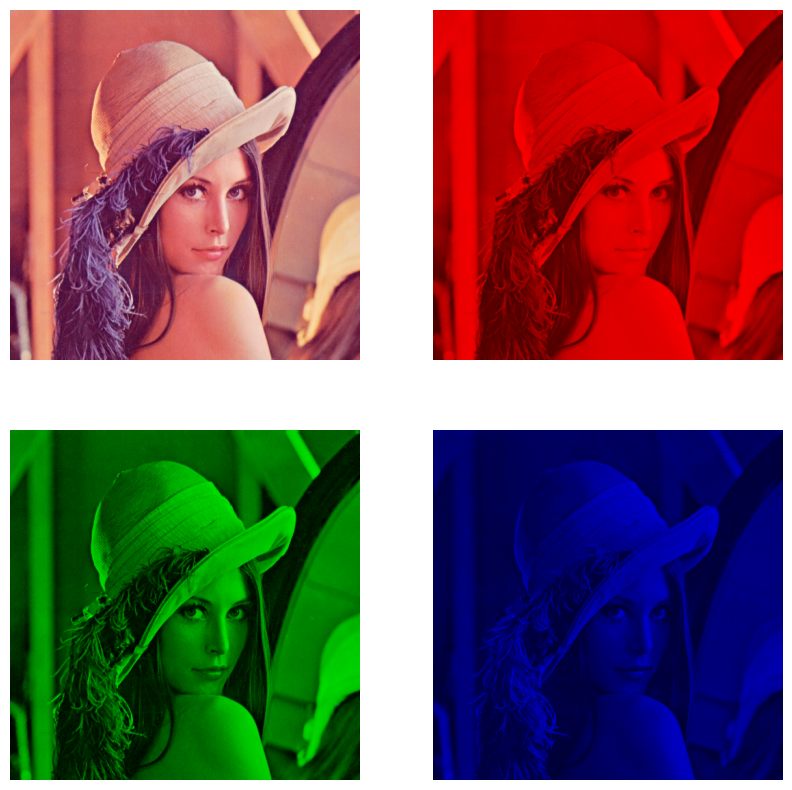

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 2D grid with[row, col] indexing
axes[0, 0].imshow(img)
axes[0, 1].imshow(red_channel)
axes[1, 0].imshow(green_channel)
axes[1, 1].imshow(blue_channel)

# turn off all axes at once
for ax in axes.flat:
    ax.axis('off')

plt.show()